In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#The quality of winr 3 to 8 
#if 3 4 5 = Low
#if 6 7 8 = High


In [5]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
print(wine_df["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


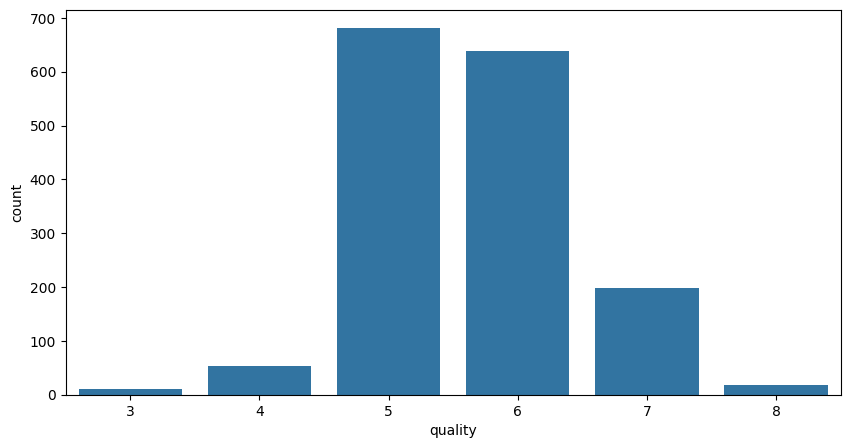

In [7]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='quality',data=wine_df)
plt.show()

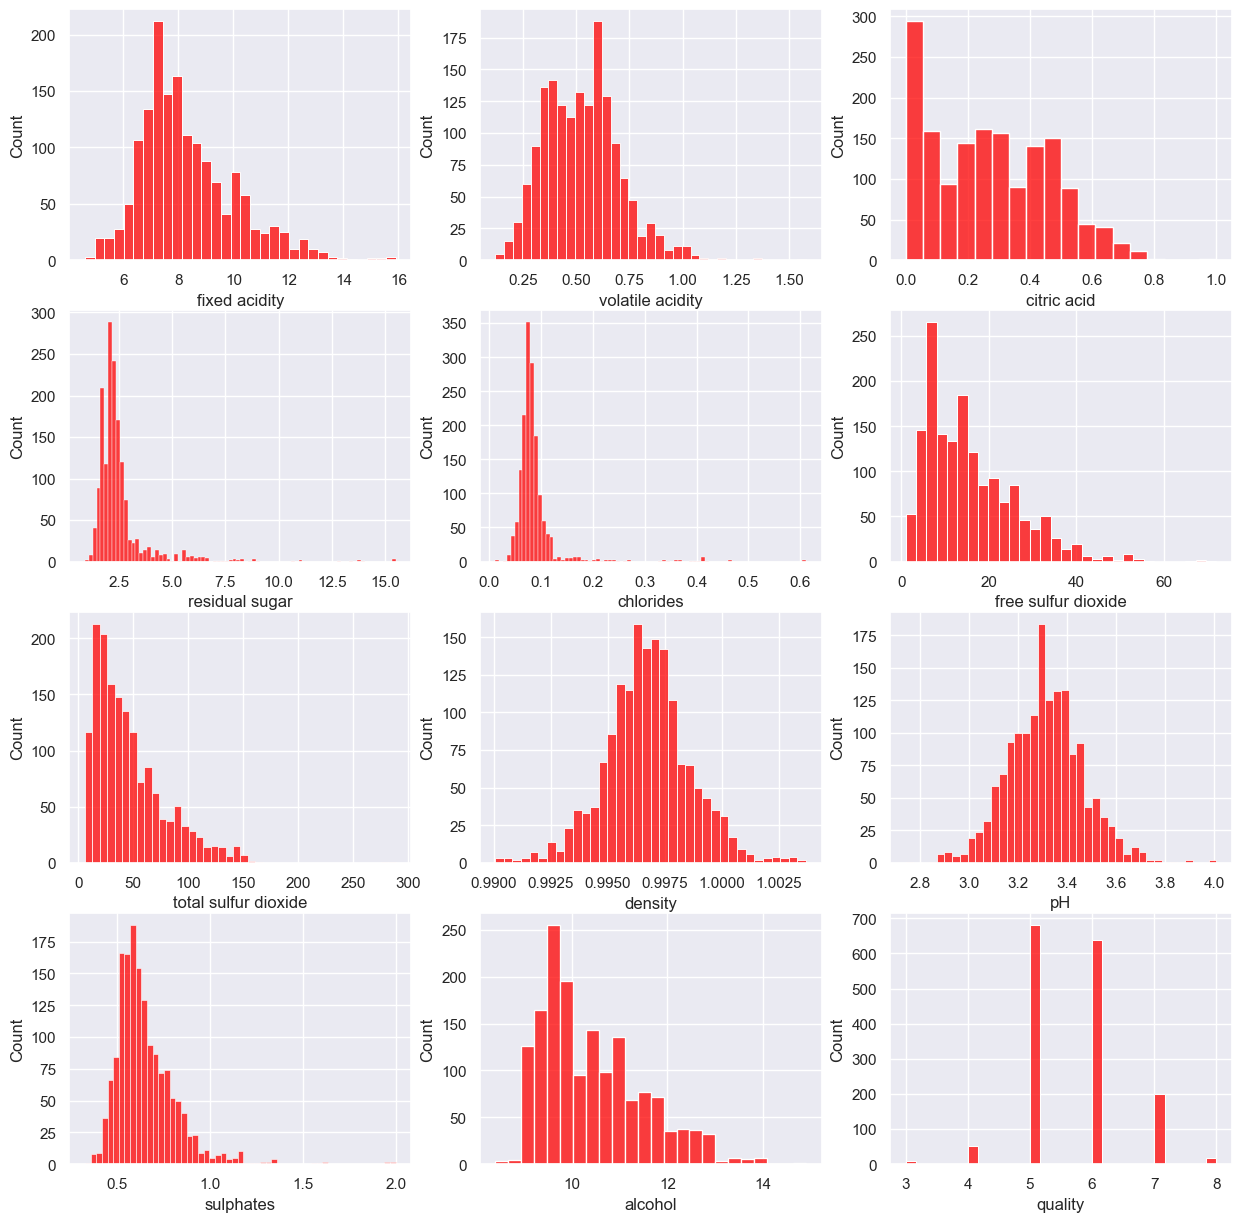

In [11]:
#Visulazation the distibtution of the all feature
sns.set(style="darkgrid")
color = sns.color_palette("pastel")

fig , ax1 = plt.subplots(4,3, figsize=(15,15))
k = 0
coloumns = list(wine_df.columns)
for i in range (4):
    for j in range (3):
        if k < len(coloumns):
            sns.histplot(wine_df[coloumns[k]], ax=ax1[i][j] , color='red')
            k += 1

plt.show()

In [15]:
def log_transform(col):
    return np.log1p(col[0])

wine_df['residual sugar'] = wine_df[['residual sugar']].apply(log_transform, axis=1)
wine_df['chlorides'] = wine_df[['chlorides']].apply(log_transform, axis=1)
wine_df['free sulfur dioxide'] = wine_df[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_df['total sulfur dioxide'] = wine_df[['total sulfur dioxide']].apply(log_transform, axis=1)
wine_df['sulphates'] = wine_df[['sulphates']].apply(log_transform, axis=1)

C:\Users\sonum\AppData\Local\Temp\ipykernel_17608\3459145510.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\sonum\AppData\Local\Temp\ipykernel_17608\3459145510.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\sonum\AppData\Local\Temp\ipykernel_17608\3459145510.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\sonum\AppData\Lo

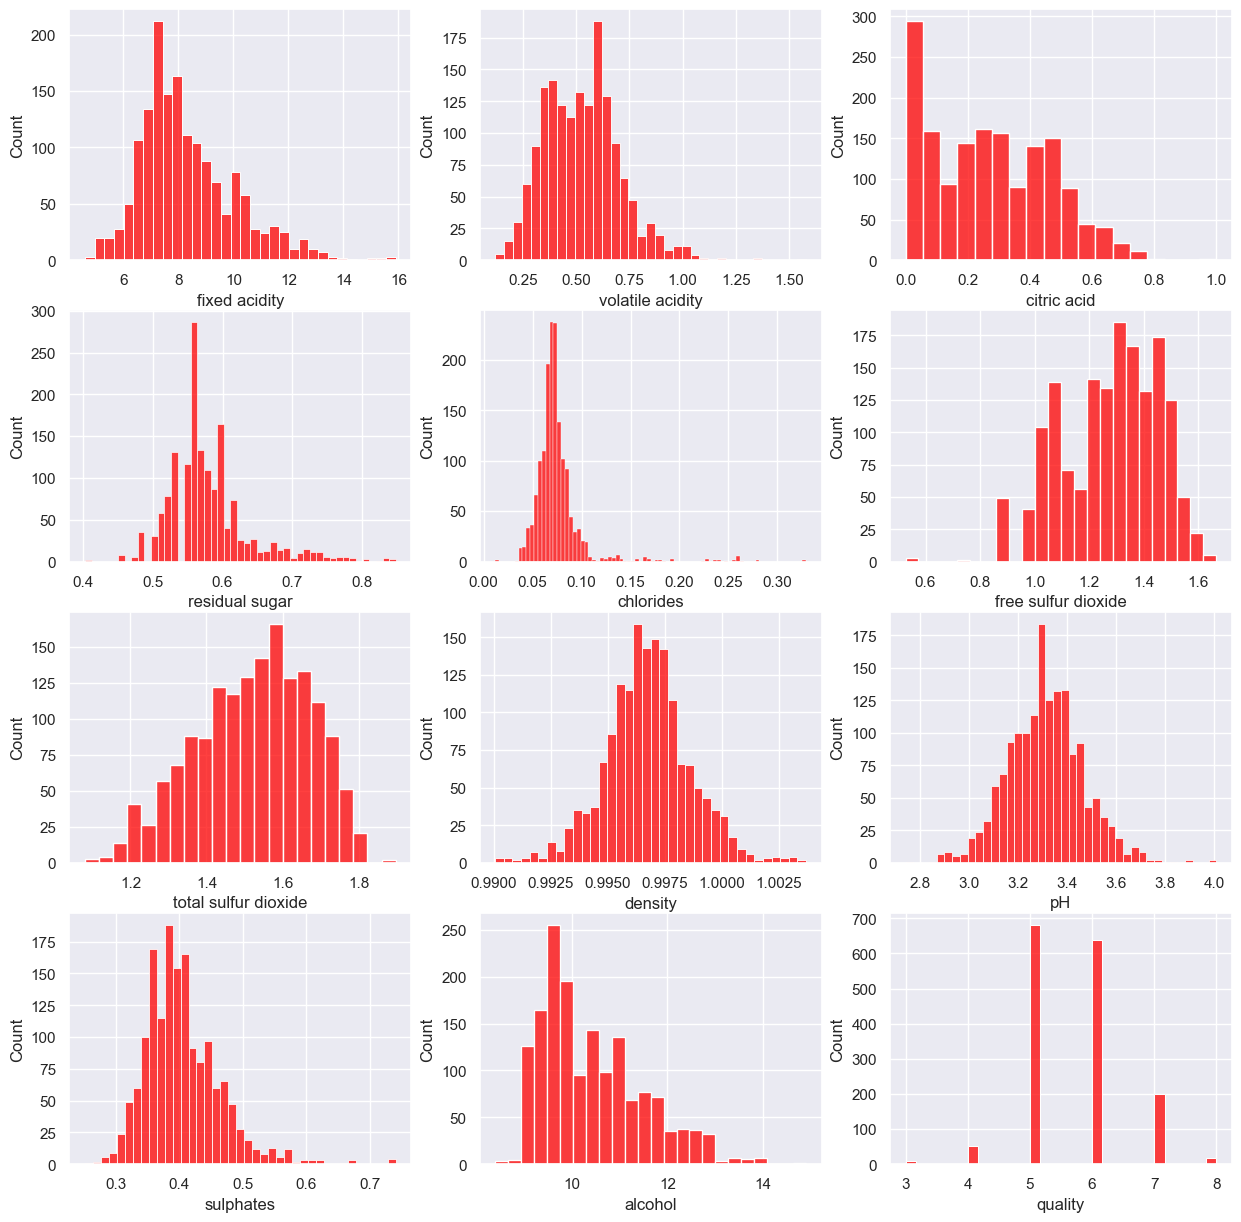

In [16]:
#Visulazation the distibtution of the all feature after log transformation
sns.set(style="darkgrid")
color = sns.color_palette("pastel")

fig , ax1 = plt.subplots(4,3, figsize=(15,15))
k = 0
coloumns = list(wine_df.columns)
for i in range (4):
    for j in range (3):
        if k < len(coloumns):
            sns.histplot(wine_df[coloumns[k]], ax=ax1[i][j] , color='red')
            k += 1

plt.show()

In [17]:
wine_df.corr().sort_values(by='quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.025281,-0.144170,-0.049020,-0.162451,-0.174919,-0.057731,0.296140,0.476166,1.000000
alcohol,-0.061668,-0.202288,0.109903,0.086108,-0.248416,-0.084525,-0.231396,-0.496180,0.205633,0.126026,1.000000,0.476166
sulphates,0.200674,-0.292512,0.328905,0.022510,0.308618,0.053326,0.062543,0.161549,-0.166164,1.000000,0.126026,0.296140
citric acid,0.671703,-0.552496,1.000000,0.175822,0.198372,-0.092824,-0.010224,0.364947,-0.541904,0.328905,0.109903,0.226373
fixed acidity,1.000000,-0.256131,0.671703,0.185639,0.120734,-0.180000,-0.115882,0.668047,-0.682978,0.200674,-0.061668,0.124052
residual sugar,0.185639,0.028143,0.175822,1.000000,0.069746,0.082021,0.143211,0.425743,-0.090932,0.022510,0.086108,0.025281
free sulfur dioxide,-0.180000,0.021956,-0.092824,0.082021,-0.009256,1.000000,0.793759,-0.040442,0.098046,0.053326,-0.084525,-0.049020
pH,-0.682978,0.234937,-0.541904,-0.090932,-0.274722,0.098046,-0.006799,-0.341699,1.000000,-0.166164,0.205633,-0.057731
chlorides,0.120734,0.078927,0.198372,0.069746,1.000000,-0.009256,0.065430,0.249294,-0.274722,0.308618,-0.248416,-0.144170
total sulfur dioxide,-0.115882,0.071098,-0.010224,0.143211,0.065430,0.793759,1.000000,0.110437,-0.006799,0.062543,-0.231396,-0.162451


In [18]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [21]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [ ]:
#data Balcing using SMOTE
#pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X, y = oversample.fit_resample(X.fillna(0), y)


In [25]:
y.value_counts()

quality
5    681
6    681
7    681
4    681
8    681
3    681
Name: count, dtype: int64

In [27]:
#clssify function
from sklearn.model_selection import train_test_split , cross_val_score

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    return model.score(X_test, y_test) * 100


In [35]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
accuracy_lr = classify(model, X, y)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr))

Logistic Regression Accuracy: 49.02%


c:\Users\sonum\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
accuracy_dtc = classify(model, X, y)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(accuracy_dtc))

Decision Tree Classifier Accuracy: 80.07%


In [39]:
#random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
accuracy_rfc = classify(model, X, y)
print("Random Forest Classifier Accuracy: {:.2f}%".format(accuracy_rfc))

Random Forest Classifier Accuracy: 85.94%


C:\Users\sonum\AppData\Local\Temp\ipykernel_17608\619206359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='pastel')


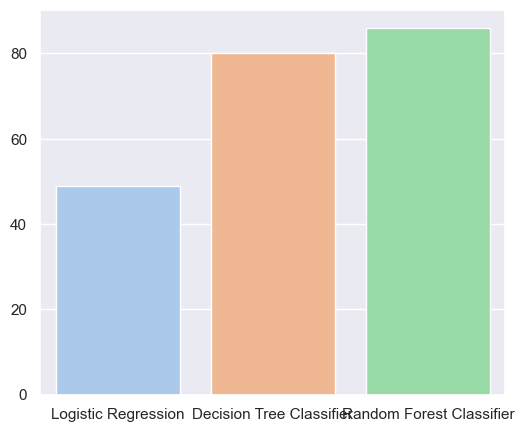

In [41]:
#Ploting the accuracy of all models
models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracy = [accuracy_lr, accuracy_dtc, accuracy_rfc]
plt.figure(figsize=(6,5))
sns.barplot(x=models, y=accuracy, palette='pastel')
plt.show()

In [44]:
#Predict the quality of wine 
#inserting new data
model = RandomForestClassifier()
model.fit(X, y)

sample_data = (7.9, 
               0.35, 
               0.46, 
               3.6, 
               0.078, 
               15, 
               37, 
               0.9973, 
               3.35, 
               0.86,
               12.8)
sample_data = np.array(sample_data).reshape(1,-1)
prediction = model.predict(sample_data)
print("Predicted wine quality:", prediction[0])

Predicted wine quality: 6


c:\Users\sonum\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
#Create Pickle file
import pickle
with open('wine_quality_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("Model saved to wine_quality_model.pkl")

Model saved to wine_quality_model.pkl
